Analysis of supermarket transaction data

Data was supplied in a .csv format, which was subsequently read into Pandas dataframe. A review of the data showed that the reciept id was not a unique key for each basket across the timeframe, it was unique only for that day. A new unique id based on date and receipt number was generated.




In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import csv into panda dataframe
df = pd.read_csv("supermarket - Copy.csv")
df['basketid']=df['Date'].astype(str)+df['Basket'].astype(str)

Question 1: A basket size of 5 items or less is the most popular basket size with over 50,000 unique baskets

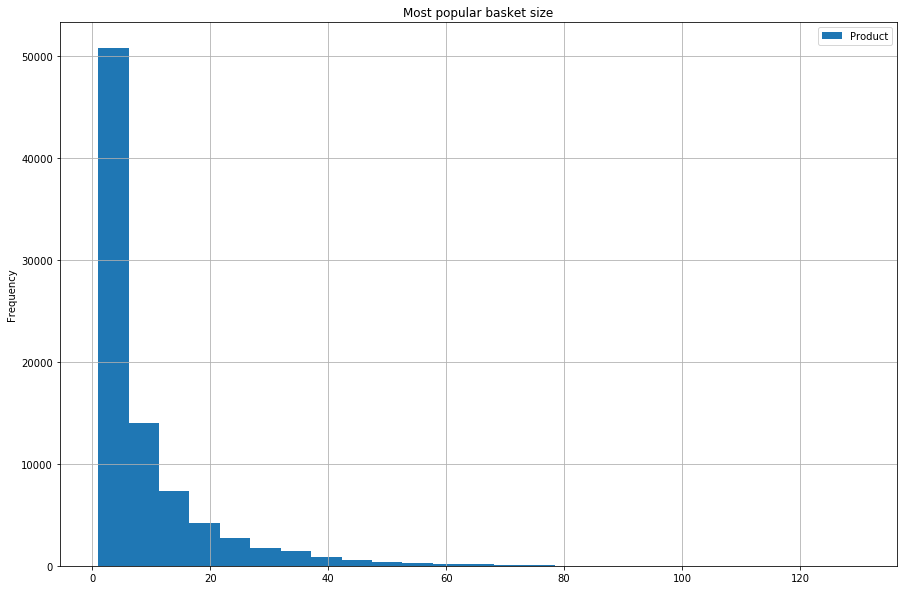

In [8]:
basket_size=df.groupby(["basketid"])[['Product']].count()
basket_size.plot.hist(stacked=False, bins=25 ,grid=True,figsize=(15,10),title=('Most popular basket size'))
#ax.set_xticklabels(bins)
plt.show()


In [9]:
basket_totals=df.groupby(["basketid"])[['Total']].sum()
basket_totals['product']=basket_size['Product']
#count2=df.pivot_table(["Product"],['basketid'], aggfunc='count')
#count2['total']=totes["Total"]
basket_totals['average price']=basket_totals['Total']/basket_totals['product']
basket_totals

,Total,product,average price
basketid,,,
07/29/05100004,22.07,2,11.035000
07/29/05100005,173.94,39,4.460000
07/29/05100007,202.62,35,5.789143
07/29/05100008,47.73,18,2.651667
07/29/05100009,62.31,19,3.279474
07/29/05100011,50.23,10,5.023000
07/29/05100013,36.87,11,3.351818
07/29/05100014,33.16,11,3.014545
07/29/05100015,12.97,2,6.485000


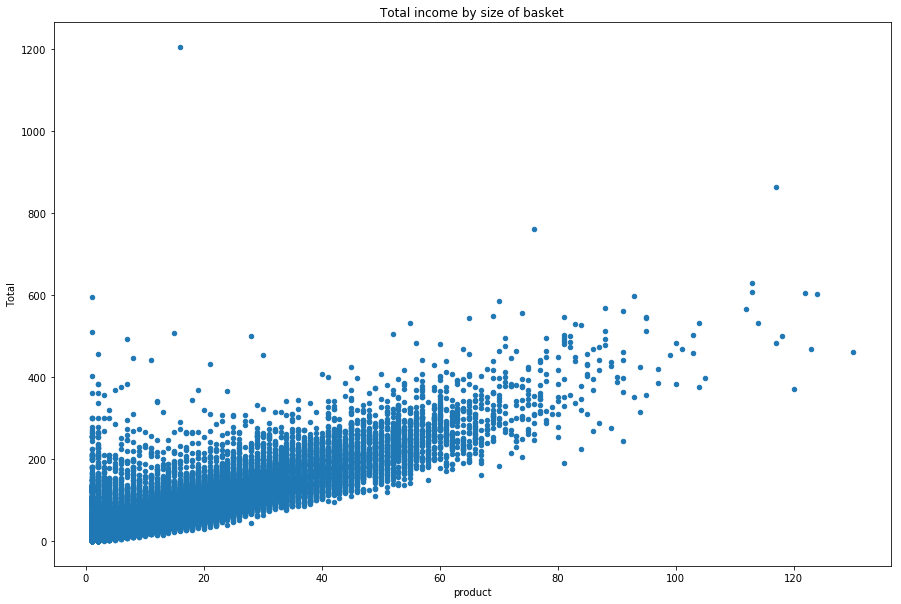

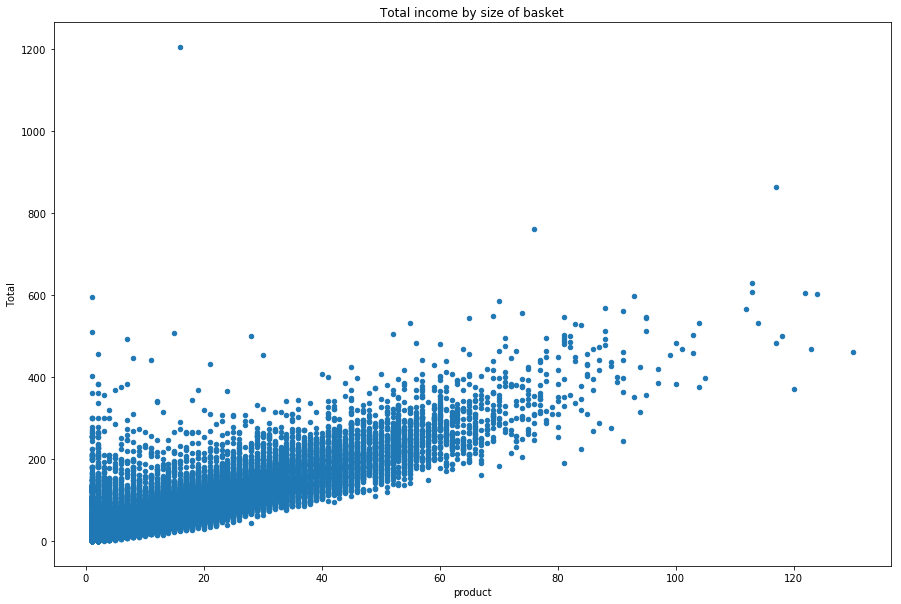

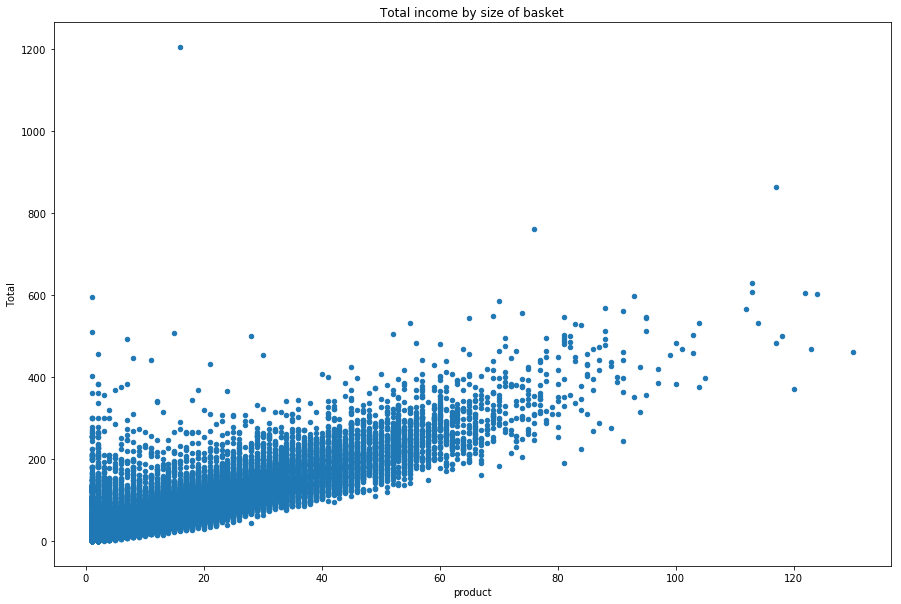

In [12]:
basket_totals.plot.scatter(x='product',y='Total',figsize=(15,10),title=('Total income by size of basket'))
plt.show()

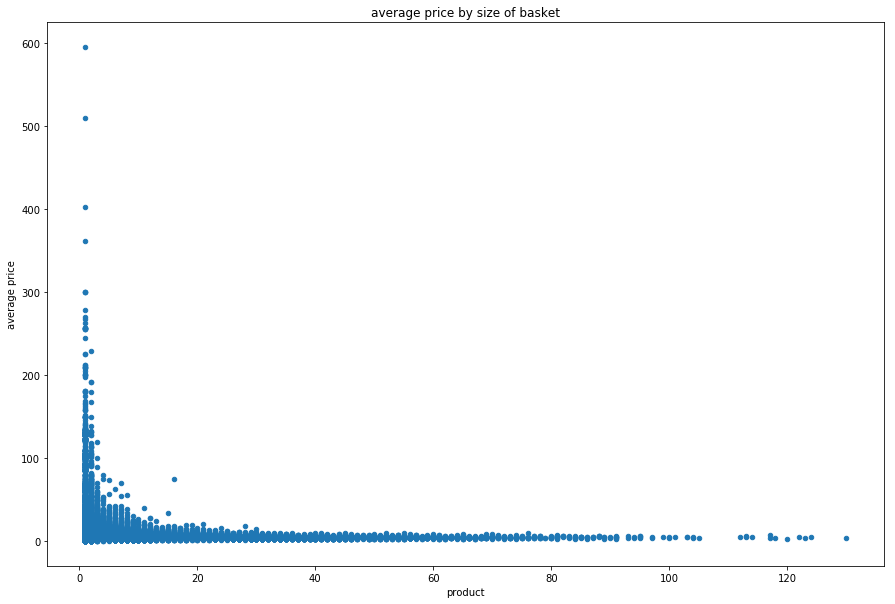

In [199]:
basket_totals.plot.scatter(x='product',y='average price',figsize=(15,10),title=('average price by size of basket'))
plt.show()

In [39]:
dates_total=df.groupby(["Date"])[['Total']].sum()
dates_total['products']=df.groupby(["Date"])[['basketid']].count()
dates_total['average_spend']=dates_total['Total']/dates_total['products']
dates_total

,Total,products,average_spend
Date,,,
07/29/05,137766.15,28767,4.789034
07/30/05,171106.55,35361,4.838849
07/31/05,168856.20,34867,4.842866
08/13/05,195701.84,40310,4.854920
08/14/05,211493.30,42554,4.969998
08/15/05,146937.54,29964,4.903803
08/16/05,131494.59,26365,4.987468
08/17/05,142526.66,28282,5.039483
08/18/05,151481.63,30345,4.991980


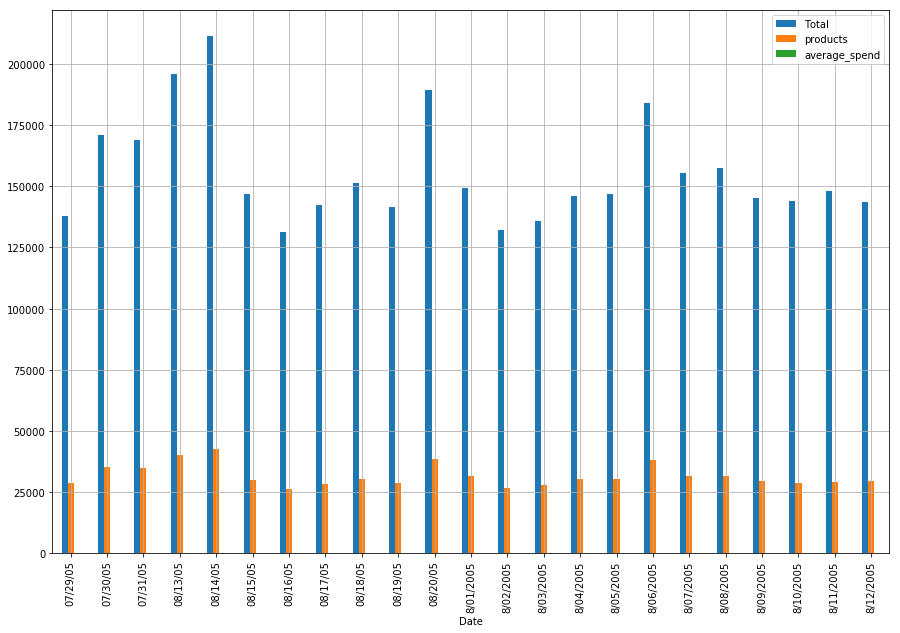

In [21]:
#dates_total=df.pivot_table(["Total"],["Date"],aggfunc='sum')
#date=df.pivot_table(["basketid"],["Date"],aggfunc='count')
#date['total']=dates_total['Total']
dates_total.plot(kind='bar',grid=True,figsize=(15,10))
plt.show()

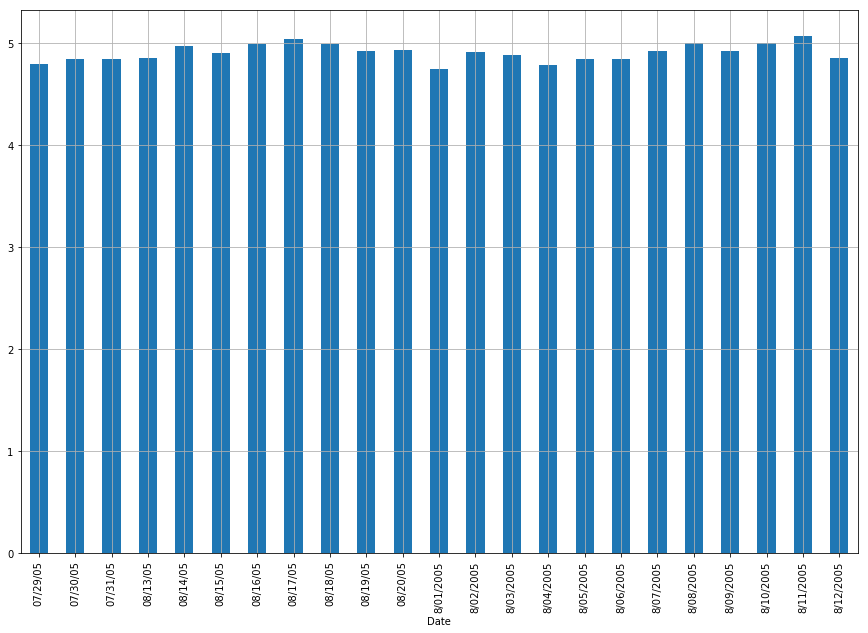

In [211]:
dates_total['average_spend'].plot(kind='bar',grid=True,figsize=(15,10))
plt.show()

In [225]:
basket_size

,Product
basketid,
07/29/05100004,2
07/29/05100005,39
07/29/05100007,35
07/29/05100008,18
07/29/05100009,19
07/29/05100011,10
07/29/05100013,11
07/29/05100014,11
07/29/05100015,2


In [13]:
basket_totals

,Total,product,average price
basketid,,,
07/29/05100004,22.07,2,11.035000
07/29/05100005,173.94,39,4.460000
07/29/05100007,202.62,35,5.789143
07/29/05100008,47.73,18,2.651667
07/29/05100009,62.31,19,3.279474
07/29/05100011,50.23,10,5.023000
07/29/05100013,36.87,11,3.351818
07/29/05100014,33.16,11,3.014545
07/29/05100015,12.97,2,6.485000


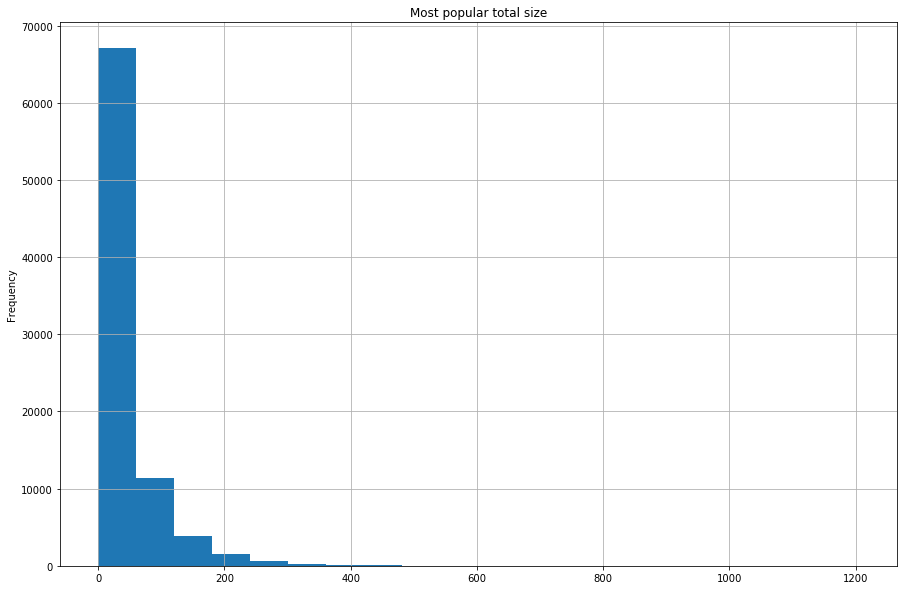

In [28]:
basket_totals['Total'].plot.hist(stacked=False, bins=20 ,grid=True,figsize=(15,10),title=('Most popular total size'))
plt.show()

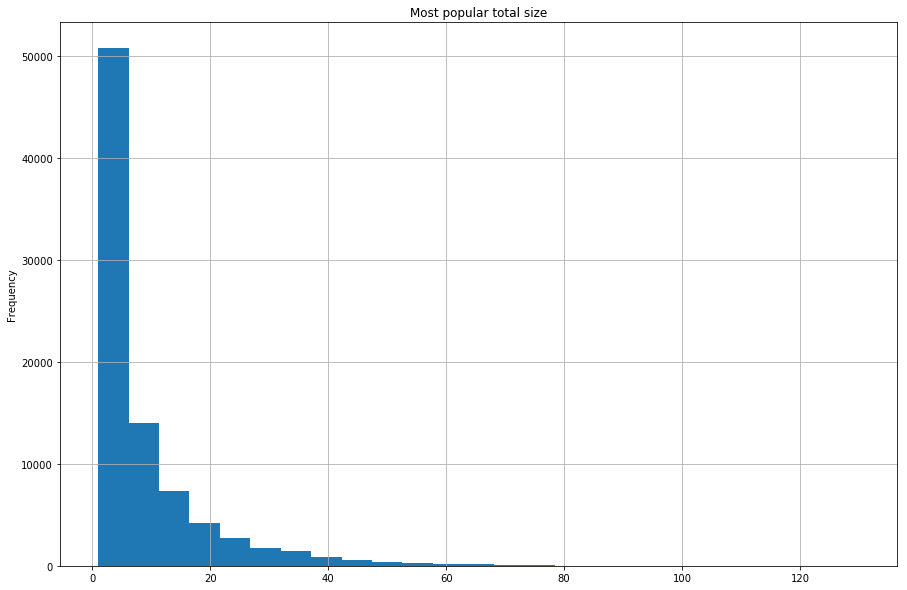

In [30]:
basket_totals['product'].plot.hist(stacked=False, bins=25 ,grid=True,figsize=(15,10),title=('Most popular total size'))
plt.show()

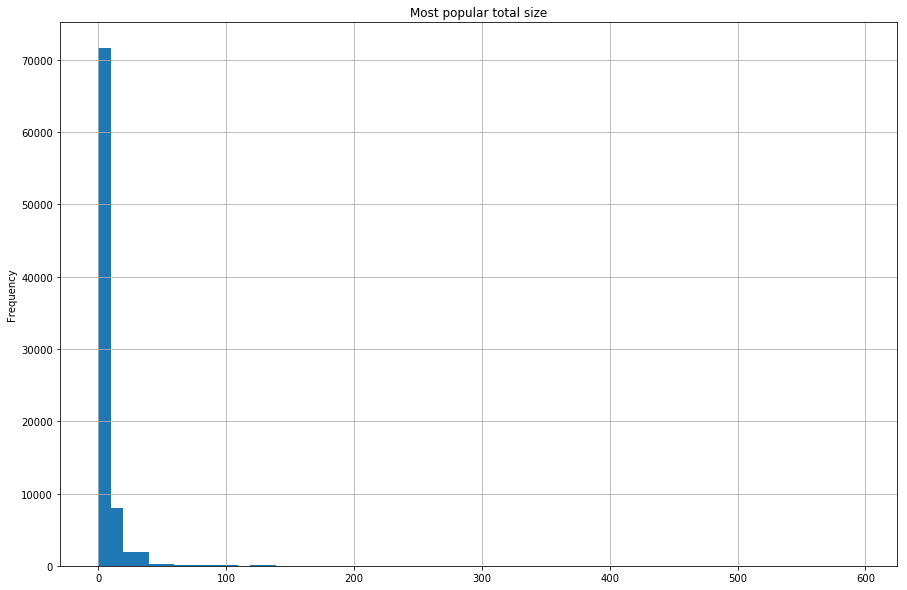

In [37]:
basket_totals['average price'].plot.hist(stacked=False, bins=60 ,grid=True,figsize=(15,10),title=('Most popular total size'))
plt.show()

In [103]:
date=df.pivot_table(["basketid"],["Date"],aggfunc='count')
date

,basketid
Date,
07/29/05,28767
07/30/05,35361
07/31/05,34867
08/13/05,40310
08/14/05,42554
08/15/05,29964
08/16/05,26365
08/17/05,28282
08/18/05,30345


In [111]:
df.apply(lambda x: x.nunique())

Department       12
Product       21079
Checkout         25
Date             23
Time          37658
Basket         4518
Total          3815
basketid      84810
dtype: int64

In [120]:
daily_baskets = df.groupby('Date')['basketid'].nunique()
daily_baskets

Date
07/29/05     3545
07/30/05     3830
07/31/05     3781
08/13/05     3970
08/14/05     4068
08/15/05     3551
08/16/05     3613
08/17/05     3717
08/18/05     3681
08/19/05     3387
08/20/05     3964
8/01/2005    3708
8/02/2005    3593
8/03/2005    3660
8/04/2005    3729
8/05/2005    3690
8/06/2005    3919
8/07/2005    3624
8/08/2005    3564
8/09/2005    3572
8/10/2005    3539
8/11/2005    3555
8/12/2005    3550
Name: basketid, dtype: int64

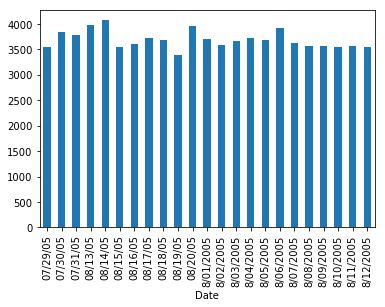

In [121]:
daily_baskets.plot(kind="bar")
plt.show()

In [136]:
baskets=df.groupby("Product")['basketid'].nunique()

In [137]:
baskets

Product
1-Feb-64       1
1.08E+14       1
1.25E+77      45
1.26E+42      21
1.28E+05      16
1.28E+11       5
1.32E+11       3
1.32E+12       6
1.38E+51      26
1.49E+41       6
1.49E+77      15
1.73E+94       2
1.84E+06       4
1.89E+39      11
1.99E+56       3
10-Dec-58     19
1000612f       5
1004f74e      10
100ed041       1
100f435e      10
101071ae       9
1012f90d       3
1014c9f7      19
101c535        2
1022214c      17
102403c6       6
10261708       4
10270dd1       1
1028f915       4
102be572      19
            ... 
ffbb77f0       1
ffbfb09e      28
ffc04afe      12
ffc25e30       1
ffc411c        3
ffc7043d      12
ffc79327       2
ffc804d8      15
ffc8fc55       1
ffc9399e       3
ffca1016       1
ffca581e      21
ffcb6558      57
ffda198       22
ffdce8a4       7
ffdf1b35       5
ffe2192       22
ffe22809       8
ffe24e39       9
ffe61e4d       2
ffe808dd      39
ffe8b624      13
ffea662f       4
ffecac88      11
fff17e97       2
fff26020     103
fff399b       22
fff656

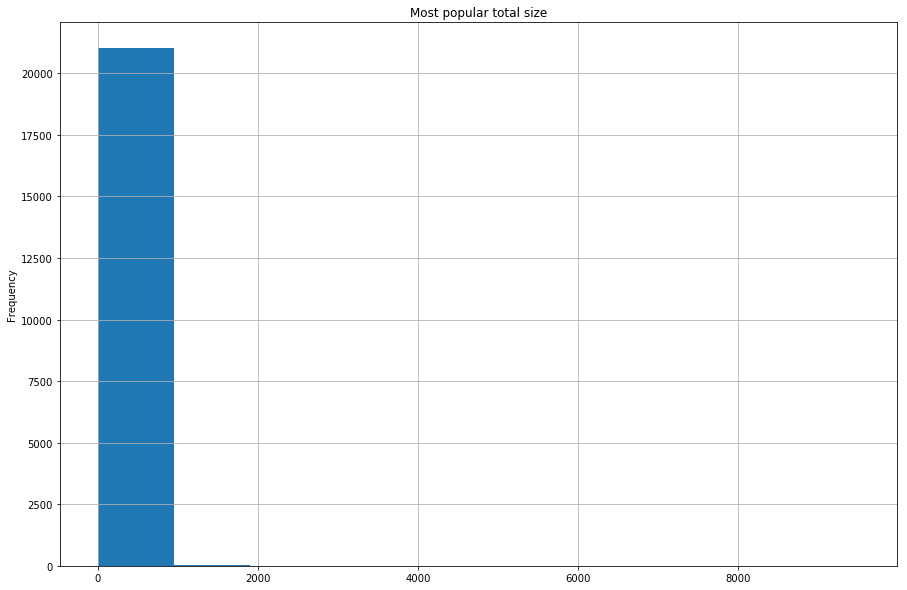

In [139]:
baskets.plot.hist(stacked=False, bins=10 ,grid=True,figsize=(15,10),title=('Most popular total size'))
plt.show()

In [142]:
basket_size

,Product
basketid,
07/29/05100004,2
07/29/05100005,39
07/29/05100007,35
07/29/05100008,18
07/29/05100009,19
07/29/05100011,10
07/29/05100013,11
07/29/05100014,11
07/29/05100015,2


In [145]:
basket_totals['product'].plot.hist
plt.show()

In [146]:
basket_totals

,Total,product,average price
basketid,,,
07/29/05100004,22.07,2,11.035000
07/29/05100005,173.94,39,4.460000
07/29/05100007,202.62,35,5.789143
07/29/05100008,47.73,18,2.651667
07/29/05100009,62.31,19,3.279474
07/29/05100011,50.23,10,5.023000
07/29/05100013,36.87,11,3.351818
07/29/05100014,33.16,11,3.014545
07/29/05100015,12.97,2,6.485000


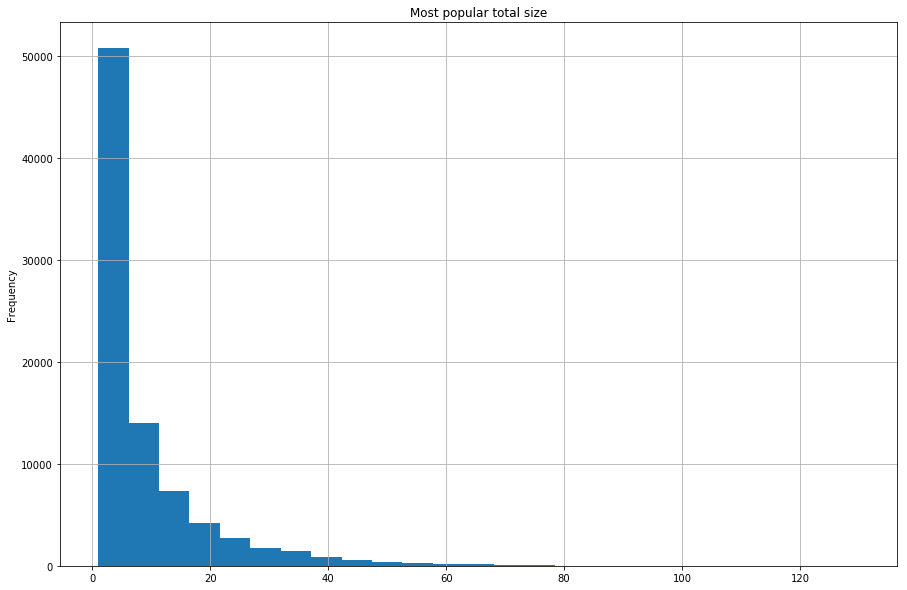

In [149]:
basket_totals['product'].plot.hist(stacked=False, bins=25 ,grid=True,figsize=(15,10),title=('Most popular total size'))
plt.show()